## 時系列データ分析

こんにちは．[しんせいたろう](https://twitter.com/shinseitaro)です．米株などを取引する個人トレーダーです．データ分析を元に取引しています．

Fintech関連の勉強会に参加したり，主催したりしていますが，同業界でなかなか女性にお会いすることがなく，今回は PyladiesTokyo Advent カレンダーに投稿して女性の方にこちらの世界に興味を持って頂ければ，と思い参加しました．宜しくお願いします．

第一章では， pandas を使ってデータの表示，プロット方法や，ちょっとした分析を行い，時系列データとは何か？を説明していきたいとおもいます．

### 想定読者

+ python 中級者
+ ある程度 pandas が使える人
+ [PythonユーザのためのJupyter[実践]入門](https://www.amazon.co.jp/dp/4774192236)はだいたいついて行けるという人
+ 世の中には株というものが存在する，というくらいは知っている人

---

### 事前準備

#### install 

+ pandas 
+ numpy 
+ matplotlib 
+ jupyter notebook 

#### データ

+ [ダウンロードセンター](https://indexes.nikkei.co.jp/nkave/index?type=download)から，`日経平均株価＞日次データ` 


###  csv to DataFrame 

ダウンロードしたデータを pandas DataFrame に読み込む際，しばしば

+ エンコーディングの指定
+ セパレータの指定
+ 要らないデータの処理
+ index 行の指定，indexの型変換

といった問題に遭遇します．そのあたりを考慮してコードを書きました．

In [7]:
%matplotlib inline

# file を DataFrame に読み込む
import pandas as pd 
import matplotlib as plt 
import matplotlib.dates as mdates

# filepath 
f = "/tmp/nikkei_stock_average_daily_jp.csv"
# encoding指定, セパレータ指定， index として使う行の指定を追加して csv を DataFrame にする
df = pd.read_csv(f, encoding="shift-jis",  sep=',', index_col="データ日付")

# 最終行5行を表示
df.tail()

,終値,始値,高値,安値
データ日付,,,,
2018/11/08,22486.92,22446.01,22583.43,22421.00
2018/11/09,22250.25,22471.31,22494.58,22226.01
2018/11/12,22269.88,22121.70,22324.01,22046.29
2018/11/13,21810.52,21885.24,21892.29,21484.65
本資料は日経の著作物であり、本資料の全部又は一部を、いかなる形式によっても日経に無断で複写、複製、転載または流布することができません。,NaN,NaN,NaN,NaN


In [8]:
# 最終行は不必要なので除去
df = df.iloc[:-1] 

In [9]:
df.tail()

,終値,始値,高値,安値
データ日付,,,,
2018/11/07,22085.80,22189.74,22444.65,21996.94
2018/11/08,22486.92,22446.01,22583.43,22421.00
2018/11/09,22250.25,22471.31,22494.58,22226.01
2018/11/12,22269.88,22121.70,22324.01,22046.29
2018/11/13,21810.52,21885.24,21892.29,21484.65


In [10]:
# index の型を確認．dtype='object'
df.index

Index(['2015/01/05', '2015/01/06', '2015/01/07', '2015/01/08', '2015/01/09',
       '2015/01/13', '2015/01/14', '2015/01/15', '2015/01/16', '2015/01/19',
       ...
       '2018/10/31', '2018/11/01', '2018/11/02', '2018/11/05', '2018/11/06',
       '2018/11/07', '2018/11/08', '2018/11/09', '2018/11/12', '2018/11/13'],
      dtype='object', name='データ日付', length=950)

In [11]:
# 日時データを扱う datetime 型に上書きする
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-13', '2015-01-14', '2015-01-15',
               '2015-01-16', '2015-01-19',
               ...
               '2018-10-31', '2018-11-01', '2018-11-02', '2018-11-05',
               '2018-11-06', '2018-11-07', '2018-11-08', '2018-11-09',
               '2018-11-12', '2018-11-13'],
              dtype='datetime64[ns]', name='データ日付', length=950, freq=None)

### Plot 

では日経平均株価の終値を描画してみましょう．ただ `plot` するだけでは味気ないので，フォーマットやグリッドの変更を加えてみます．

（**メモ**： 描画の際，日本語が表示されない場合は，こちらを参照して下さい→ [3分でmatplotlibを日本語対応させる - Qiita - ](https://qiita.com/knknkn1162/items/be87cba14e38e2c0f656)）




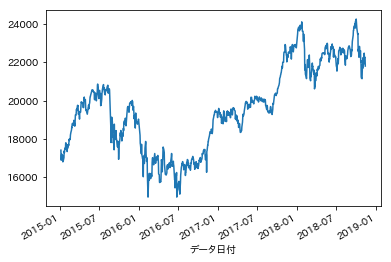

In [12]:
plt.rcParams['font.family'] = 'IPAPGothic'

# 終値だけ折れ線グラフで表示
df["終値"].plot()

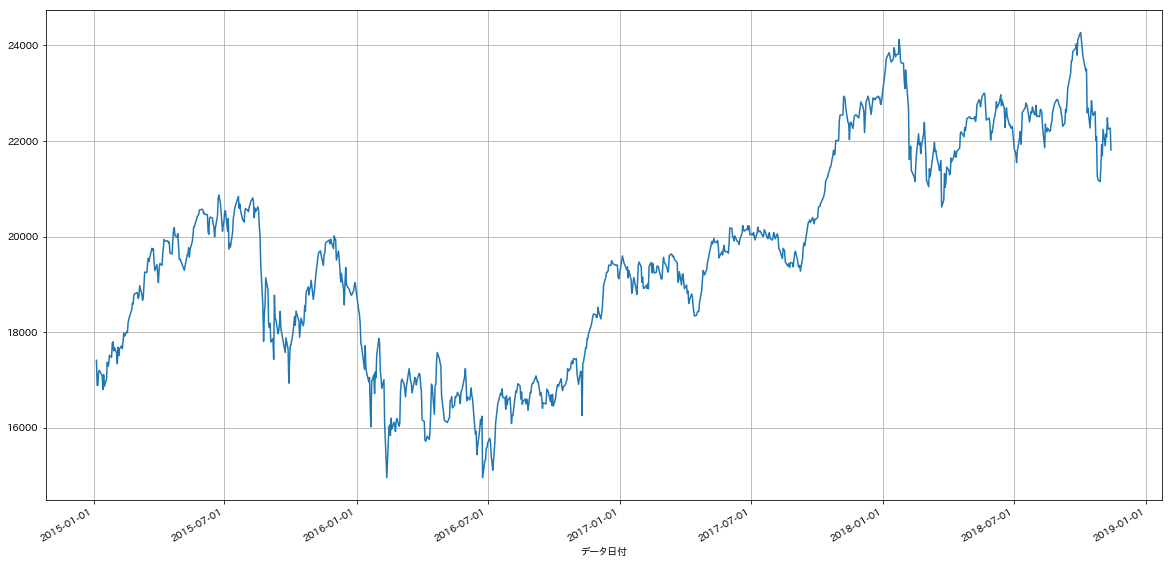

In [13]:
# x軸の日付フォーマットを変更
# プロットのサイズを大きく変更
# グリッドを表示
# (ここはsubplotで書き直すべきかなー？)
ax = df["終値"].plot(figsize=(20,10), grid=True)
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


### 毎日の収益を確認する

日経平均の日々の収益率（＝変化率）を確認してみましょう．毎日の収益率を見るので，計算式は`今日の終値/前日の終値-1` です．これは [pct_change](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pct_change.html)で計算できます．計算結果を点グラフで見てみましょう


In [14]:
df["終値"].pct_change().tail()

データ日付
2018-11-07   -0.002797
2018-11-08    0.018162
2018-11-09   -0.010525
2018-11-12    0.000882
2018-11-13   -0.020627
Name: 終値, dtype: float64

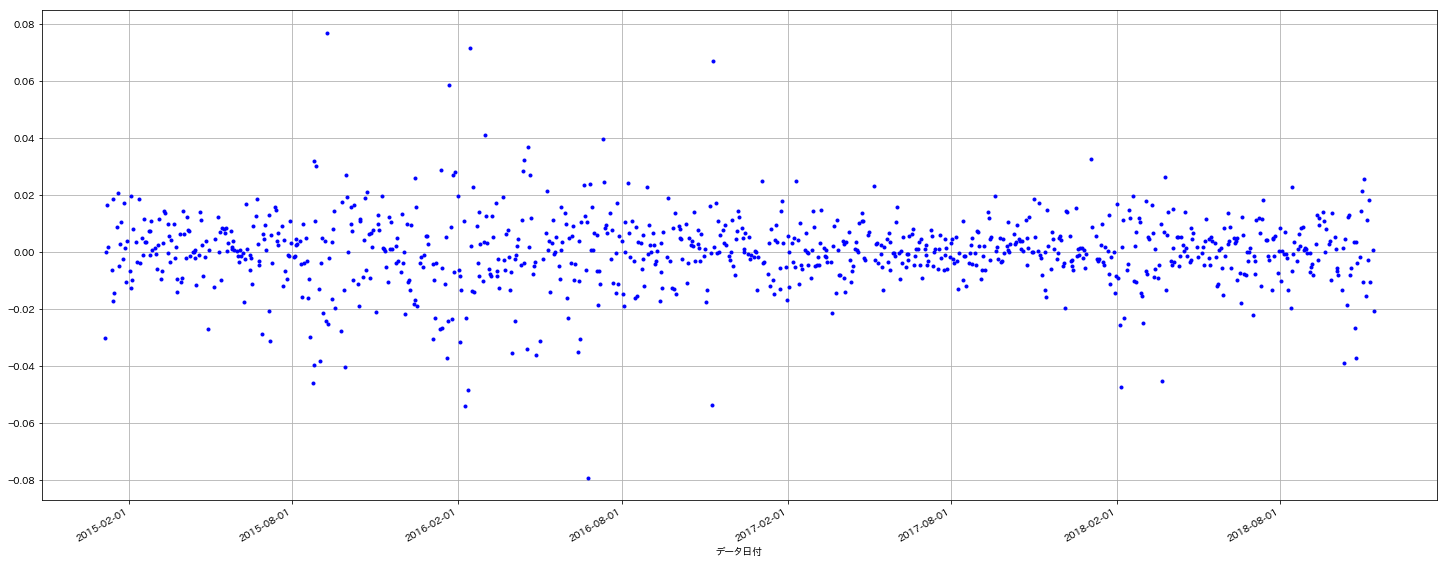

In [15]:
ax = df["終値"].pct_change().plot.line(style=['b.'], figsize=(25,10), grid=True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


このグラフは,**日本時間平日15時の日経平均株価を，前日の同時刻の価格と比較**して点で表現したグラフです．横軸は日付，縦軸は変化率を表します．このグラフを眺めながら，本題である**時系列データ**について考えてみましょう．

### 時系列データ

上記グラフを見て，気がついたことを上げてみて下さい．例えば，

+ 2015年8月頃〜2016年前半くらいまで点が上下に大きくバラバラ動いて見える
+ 2017年8月前後は，点が0.00近くに寄っているように見える
+ 大体の点は-0.02〜0.02の間に入っているように見える
+ 時期によってばらつきが大きく異なる

と言ったことが見えると思います

では次に，同時期の株価の最小値と最大値を使ってランダムにデータを，毎日発生させ終値を作り，上記と同じように日次収益率を取得してみましょう.



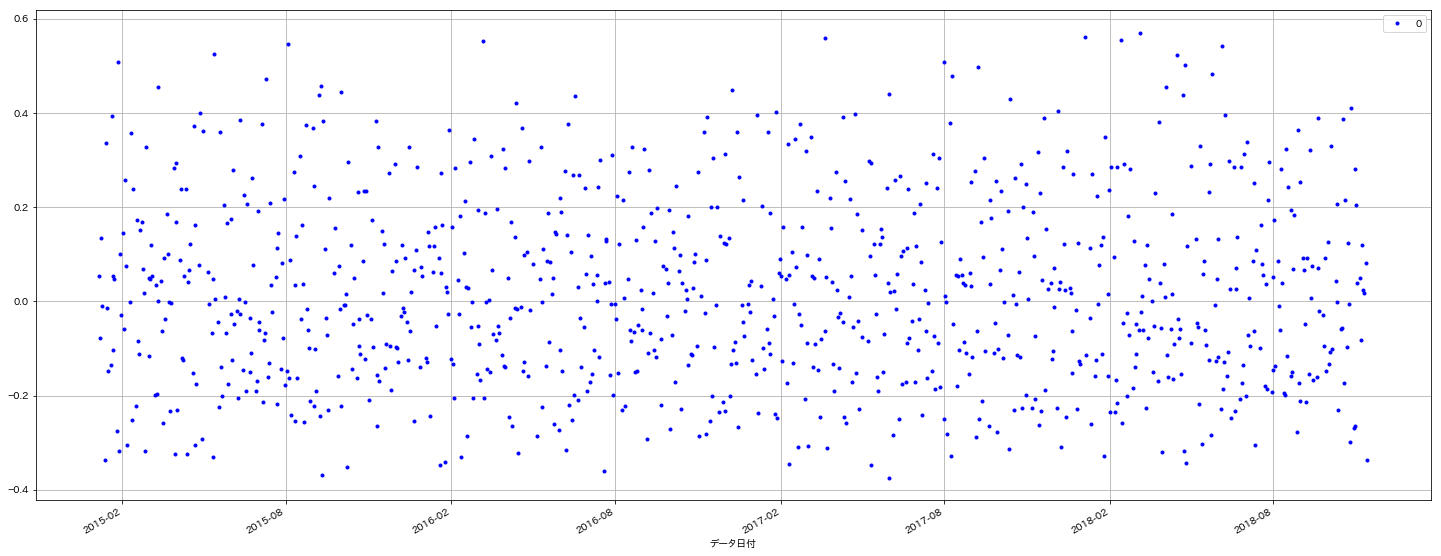

In [22]:
import numpy as np
df_random = pd.DataFrame(np.random.randint(df['終値'].min(), df['終値'].max(), size=len(df)), index=df.index)
df_random.pct_change().plot.line(style=['b.'], figsize=(25,10), grid=True)


今度はどういう特徴が有りますか？

+ 全体的にばらついている
+ 「特定の時期に，特定の特徴がある」といったことはない．
+ 大体-0.04〜0.06の間に収まっている

といったことが言えますね．

`df_random` は，毎日ランダムに終値に作っていますので，**前日の価格と今日の価格の間に関係はありません**．よって描画したように，全体的にばらつきのあるデータになります．

一方，日経平均株価の収益率は，**明らかに偏りがある時期**が存在します．それは，**過去の価格が未来の価格に影響している時もある**という言えるでしょう．

